In [1]:
# Standard Imports
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the Data
train = pd.read_csv('input/train_Titanic.csv')
test = pd.read_csv('input/test_Titanic.csv')

# Clean data

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 39.2+ KB


In [5]:
def setGender(df):
    
    df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    df = df.drop('Sex', axis = 1)
    return df

def setPort(df):
   
    df['Port'] = df['Embarked'].dropna().map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    df = df.drop('Embarked', axis = 1)
    return df

def setAge(df):
    
    median_ages = np.zeros((2,3)) 
    for i in range(0, 2):
        for j in range(0, 3):
            median_ages[i,j] = df[(df['Gender'] == i) & \
                                  (df['Pclass'] == j + 1)]['Age'].dropna().median()
            
    # copy of age
    df['AgeFill'] = df['Age']
    
    # whether the Age was originally missing
    df['AgeIsNull'] = pd.isnull(df.Age).astype(int)
    
    # fill in missing data
    for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Gender == i) \
                          & (df.Pclass == j+1), 'AgeFill'] = median_ages[i,j]
    
    df = df.drop(['Age', 'AgeIsNull'], axis = 1)
    
    return df

def setFare(df):
    median_fares = np.zeros((1,3)) 
    for j in range(0, 3):
        median_fares[0,j] = df[df['Pclass'] == j + 1]['Fare'].dropna().median()
        
    # copy of age
    df['FareFill'] = df['Fare']
    
    # whether the Age was originally missing
    df['FareIsNull'] = pd.isnull(df.Fare).astype(int)
    
    # fill in missing data
    for j in range(0, 3):
        df.loc[ (df.Fare.isnull()) & (df.Pclass == j+1), 'FareFill'] = median_fares[0,j]
    
    df = df.drop(['Fare', 'FareIsNull'], axis = 1)
    
    return df

In [6]:
train = setGender(train)
train = setPort(train)
train = setAge(train)
train = setFare(train)
train = train.drop(['Name','Ticket','Cabin'], axis = 1)
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
SibSp          889 non-null int64
Parch          889 non-null int64
Gender         889 non-null int32
Port           889 non-null float64
AgeFill        889 non-null float64
FareFill       889 non-null float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 66.0 KB


In [7]:
test = setGender(test)
test = setPort(test)
test = setAge(test)
test = setFare(test)
test = test.drop(['Name','Ticket','Cabin'], axis = 1)
# test = test.dropna()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
SibSp          418 non-null int64
Parch          418 non-null int64
Gender         418 non-null int32
Port           418 non-null int32
AgeFill        418 non-null float64
FareFill       418 non-null float64
dtypes: float64(2), int32(2), int64(4)
memory usage: 26.1 KB


In [9]:
# save new training table
train.to_csv('input/train2.csv', index=False)
test.to_csv('input/test2.csv', index=False)

# Data visualization for replacing missing fare values

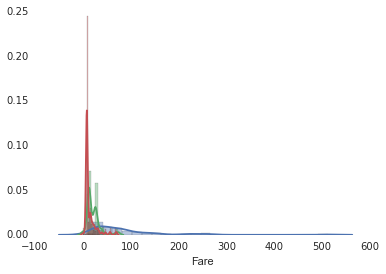

In [15]:
# distributions of fares by class
sns.distplot(train['Fare'][train['Pclass'] == 1]) # blue
sns.distplot(train['Fare'][train['Pclass'] == 2]) # green
sns.distplot(train['Fare'][train['Pclass'] == 3]) # red

{'boxes': [<matplotlib.lines.Line2D at 0xca0f828>,
 'caps': [<matplotlib.lines.Line2D at 0xca16c50>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xca1cc50>,
 'whiskers': [<matplotlib.lines.Line2D at 0xca0fbe0>,
  <matplotlib.lines.Line2D at 0xca369e8>]}

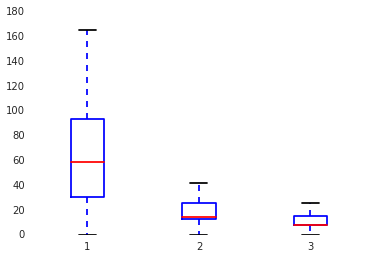

In [25]:
# box-plot of fares by class

data = [train['Fare'][train['Pclass'] == 1].values, train['Fare'][train['Pclass'] == 2].values, \
       train['Fare'][train['Pclass'] == 3].values]
plt.boxplot(data, 0, '') # don't show outlier points
      